# Домашняя работа

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

Создаем произвольный датасет по продаже обуви.

In [2]:
n_samples = 10000

#заполняем произвольными начениями 1 и 2, где подразумеваем, что 1 - мужчины; 2 - женщины
#можно было заполнить male, female, но их бы для удобства модели все равно пришлось бы переводить в 1 и 2.
gender = np.random.choice(2, n_samples)

#заполняем произвольными размера приобретенной обуви 
feet_size = np.random.randint(35, 45, n_samples)

#заполняем произвольной частью дня для просчета. 1 - утро; 2 - день; 3 - вечер.
part_of_day = np.random.randint(1, 4, n_samples)

#заполняем произвольной стоимостью и для удобства делаем ее кратной 500 рублям
price = np.random.choice(np.arange(3000, 9000, 500), n_samples)

data = pd.DataFrame({'gender': gender, 'feet_size': feet_size, 'price': price, 'part_of_day': part_of_day})
data.head()

,gender,feet_size,price,part_of_day
0,1,44,4000,2
1,1,43,6500,3
2,0,44,6000,1
3,1,37,3500,3
4,0,36,8500,1


Смотрим распределение количество покупок по размеру обуви

In [3]:
data.feet_size.value_counts()

35    1028
40    1022
42    1021
37    1006
44    1006
38     999
36     996
43     978
41     974
39     970
Name: feet_size, dtype: int64

Смотрим распределение покупок среди мужчин и женщин

In [4]:
data.gender.value_counts()

0    5031
1    4969
Name: gender, dtype: int64

Проверяем распределение по цене

In [5]:
data.price.value_counts()

7000    905
8500    850
6500    844
6000    837
7500    836
3500    836
8000    836
4500    828
5500    816
5000    813
3000    803
4000    796
Name: price, dtype: int64

Создаем датафрейм со всеми необходимыми данными

In [6]:
data = pd.DataFrame({'gender': gender, 'feet_size': feet_size, 'price': price, 'part_of_day': part_of_day})
data.head()

,gender,feet_size,price,part_of_day
0,1,44,4000,2
1,1,43,6500,3
2,0,44,6000,1
3,1,37,3500,3
4,0,36,8500,1


Смотрим взаимозависимость между переменными, которые у нас есть в датафрейме

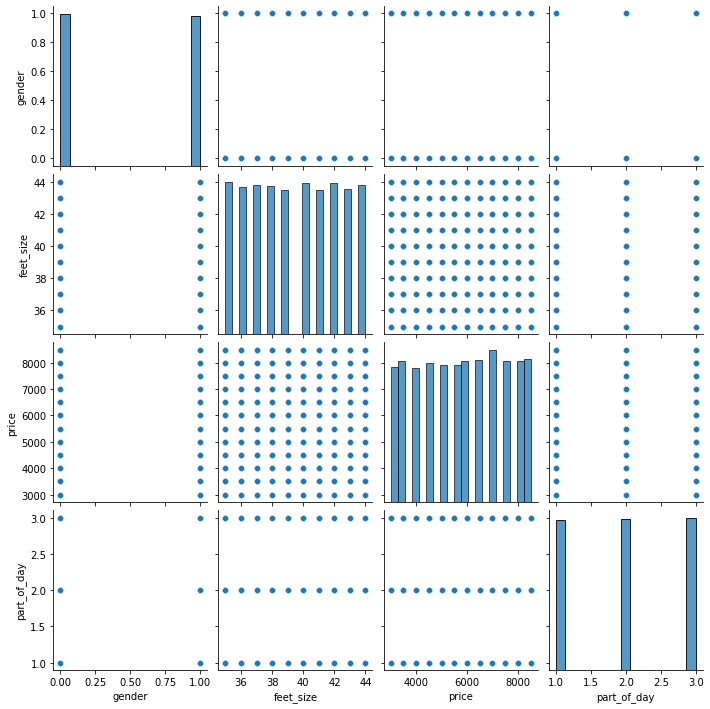

In [7]:
sns.pairplot(data)

Создаем обычную линейную регрессию со всеми параметрами, которые есть в датасете. При стоимости от 3000 до 8500 получаем очень большую ошибку равную почти 1500

In [8]:
X = data[['gender', 'feet_size', 'part_of_day']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['gender', 'feet_size', 'part_of_day']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [36.88050085 -0.04505878 -9.59536404]
Bias: 5785.082397530337
Error: 1497.7429191027431


Проверяем на медианную ошибку и видим, что она получается очень большой для наших данных

In [9]:
y.median()

6000.0

Делаем проверку с меньшим числом параметров, но получаем всё также большую ошибку, которая также равна практически 1500

In [10]:
X = data[['gender', 'feet_size']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['gender', 'feet_size']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [36.90784751 -0.05663824]
Bias: 5766.296930925567
Error: 1497.716720904021


Создаем признак для мужчин - размер обуви больше или равно 40 и пол равен 1

In [11]:
data['men_shoes'] = ((data['feet_size'] >= 40) & (data['gender'] <= 1))
data.head()

,gender,feet_size,price,part_of_day,men_shoes
0,1,44,4000,2,True
1,1,43,6500,3,True
2,0,44,6000,1,True
3,1,37,3500,3,False
4,0,36,8500,1,False


Проверяем теперь уже с нашим новым признаком и получаем всё также большую ошибку, что указывает нам на то, что надо вводить другие признаки у которых будет или очень маленькая ошибка или ее не будет вообще

In [12]:
X = data[['men_shoes']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['men_shoes']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [24.28704097]
Bias: 5770.254050810162
Error: 1497.8686393067458


Создаем еще один признак - цена в евро

In [13]:
data['price_euro'] = data['price'] / 90
data.head()

,gender,feet_size,price,part_of_day,men_shoes,price_euro
0,1,44,4000,2,True,44.444444
1,1,43,6500,3,True,72.222222
2,0,44,6000,1,True,66.666667
3,1,37,3500,3,False,38.888889
4,0,36,8500,1,False,94.444444


Проверяем еще один новый признак на отклонение и ошибки. Получаем очень маленькую ошибку и очень хороший вес 90.

In [14]:
X = data[['price_euro']]
y = data['price']
reg = LinearRegression().fit(X, y)
print(f'Weights: {format(reg.coef_)}')
print(f'Bias: {format(reg.intercept_)}')

pred_values = reg.predict(data[['price_euro']])
print(f'Error: {format(mean_absolute_error(pred_values, y))}')

Weights: [90.]
Bias: 6.366462912410498e-12
Error: 1.819307726691477e-12


Далее строим графики pairplot, чтобы посмотреть зависимость и да, теперь price и price_euro в линейной зависимости, что в принципе легко было предположить :)

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


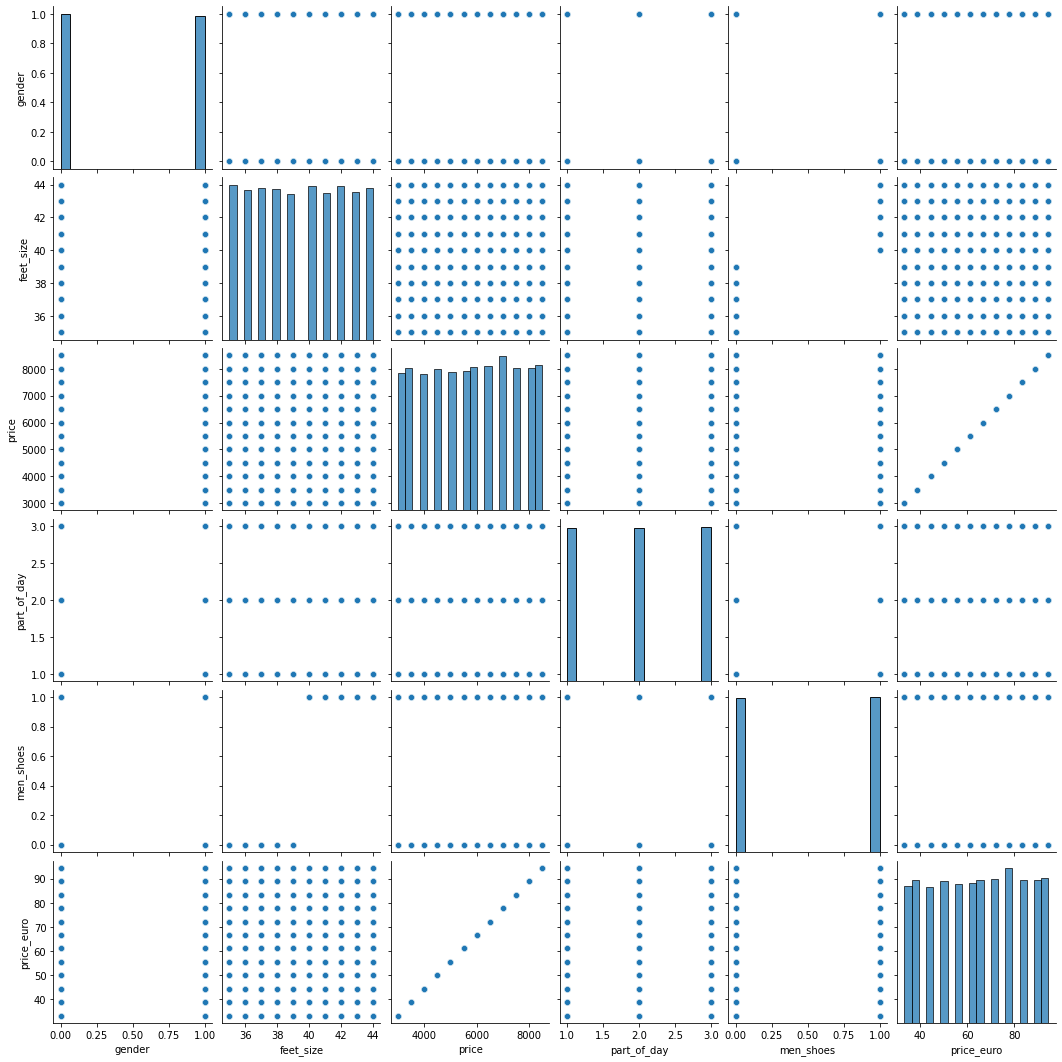

In [15]:
sns.pairplot(data)